# Potting and Data Viz Tools

In [ ]:
import pandas as pd
import os
import morpc

## Write data and charts to Excel

Excel-based charts are exceptionally useful to our customers because they are easy for our customers to manipulate, style, and include in downstream products such as PowerPoint slides.  They are, however, inconvenient to product programmatically.  The following functions are intended to simplify the production of Excel-based charts that are consistent with MORPC branding and, eventually, with Data & Mapping visualization standards.

### data_chart_to_excel( )

This function will create an Excel worksheet consisting of the contents of a pandas dataframe (as a formatted table) and, optionally, a chart to visualize the series included in the dataframe.  The simplest invocation will produce a table and a basic column (vertical bar) chart with default formatting that is consistent with MORPC branding guidelines, however the user can specify many of options supported by the xlsxwriter library (https://xlsxwriter.readthedocs.io/).

The following blocks demonstrates some simple use cases.  First, create a dataframe with demonstration data.

In [ ]:
d = {'col1': [1, 2, 3, 4], 'col2':[3, 4, 5, 6]}
df = pd.DataFrame(data=d)
df

Next create an Excel object using the xlsxwriter package.  The object is linked to an Excel workbook, as indicated by the path in the first argument.

In [ ]:
# Create a directory to store the output (for demonstration purposes only)
if not os.path.exists("./temp_data"):
    os.makedirs("./temp_data")

writer = pd.ExcelWriter("./temp_data/dataChartToExcelOutput.xlsx", engine='xlsxwriter')

The following block will create a new worksheet in the Excel object which contains a table representing the dataframe and column chart displaying the series in the table.  The new worksheet will be called "Sheet1" since no sheet name was specified.  Default presentation settings will be used since we did not specify any settings.  This will result in a column (vertical bar) chart.

**Note: You will not be able to view the spreadsheet itself until the writer object is closed in a later block.**

In [ ]:
morpc.data_chart_to_excel(df, writer)  

The following block will add another worksheet to the xlsxwriter object.  This time we specified a sheet name ("LineChart") and a chart type ("line"), so the code will create the same table as the previous command but will produce a line chart instead of a column chart.  As before, the default presentation settings will be used.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="LineChart", chartType="line")

The following block goes a step further and specifies a subtype for the chart.  Specifically it creates a stacked column chart.  As before, the default presentation settings will be used.  For more information about what chart types and subtypes are available, see https://xlsxwriter.readthedocs.io/workbook.html#workbook-add-chart.  The supported chart types as of this writing include column, bar, and line.  The stacked subtype has been minimally tested for column and bar charts.  Other chart types and subtypes may or may not work without further improvements to the function.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="Stacked", chartType="column", chartOptions={"subtype":"stacked"})

The next block demonstrates the "bar" (horiztontal bar) chart type and applies some custom presentation settings, specifically a set of user-specified colors and titles, and omission of the legend, which is displayed by default.

In [ ]:
morpc.data_chart_to_excel(df, writer, sheet_name="Custom", chartType="bar", chartOptions={
    "colors": ["cyan","magenta"],                   # Specify a custom color
    "hideLegend": True,                             # Hide the legend
    "titles": {                                     # Specify the chart title and axis titles
        "chartTitle": "My Chart",
        "xTitle": "My independent variable",
        "yTitle": "My dependent variable",
    }
})

Finally, we have to close the xlsxwriter object to finalize the Excel workbook and make it readable.

In [ ]:
writer.close()

Now you should be able to open the Excel document at `./temp_data/dataChartToExcelOutput.xlsx`

Note that many more customizations are possible.  To learn more, uncomment and run the following block, or enter the command in your own notebook or a Python interpreter.

!["A screenshop of the resulting Excel worksheet"]('/temp_data/Screenshot 2025-06-03 080403.png')

In [ ]:
# help(morpc.data_chart_to_excel)

## Plot from Resource (in development)

Plot a graph or chart from a frictionless resource based on schema and data types. 

In [1]:
import morpc

### Build a sample resource file.

In [2]:
df, resource, schema = morpc.frictionless.load_data('../../morpc-pop-collect/output_data/morpc-pop-collect.resource.yaml')

morpc.load_data | INFO | Loading Frictionless Resource file at location ..\..\morpc-pop-collect\output_data\morpc-pop-collect.resource.yaml
morpc.load_data | INFO | Loading data, resource file, and schema from their source locations
morpc.load_data | INFO | --> Data file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.csv
morpc.load_data | INFO | --> Resource file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.resource.yaml
morpc.load_data | INFO | --> Schema file: ..\..\morpc-pop-collect\output_data\morpc-pop-collect.schema.yaml
morpc.load_data | INFO | Loading data.
cast_field_types | INFO | Casting field POP as type integer.
cast_field_types | INFO | Casting field GEOIDFQ as type string.
cast_field_types | INFO | Casting field SUMLEVEL as type string.
cast_field_types | INFO | Casting field REFERENCE_PERIOD as type date.
cast_field_types | INFO | Casting field REFERENCE_PERIOD_FREQ as type string.
cast_field_types | INFO | Casting field VINTAGE_PERIOD as type string.


In [45]:
resource

{'name': 'morpc_pop_collect',
 'type': 'file',
 'title': 'MORPC Collected Population Data',
 'description': 'This dataset is a compendium of population counts, estimates, '
                'and forecasts for geographies in the MORPC 15-County region '
                'that has been compiled from various sources and converted to '
                'a standard form.  The input sources include: Census '
                'Intercensal Estimates, Census Population Estimates Program, '
                'Census American Community Survey, Mid-Ohio Regional Planning '
                'Commission, Ohio Department of Development, ESRI.',
 'profile': 'data-resource',
 'path': 'morpc-pop-collect.csv',
 'scheme': 'file',
 'format': 'csv',
 'mediatype': 'text/csv',
 'hash': 'c41383831f01cf7a64d01111e3cee4c2',
 'bytes': 1957009,
 'schema': 'morpc-pop-collect.schema.yaml'}

In [3]:
df = df.sort_values('VINTAGE_PERIOD', ascending=False).groupby(['GEOIDFQ', 'REFERENCE_PERIOD']).head(1).sort_values('REFERENCE_PERIOD')

In [4]:
grouped = df.groupby('GEOIDFQ')

In [55]:
name, df = [x for x in grouped][3]

In [56]:
import pandas as pd
conf_u = df[df['VALUE_TYPE']=='FORECAST'][['REFERENCE_PERIOD', 'CONF_LIMIT_UPPER']].rename(columns = {'CONF_LIMIT_UPPER':'POP'})
conf_l = df[df['VALUE_TYPE']=='FORECAST'][['REFERENCE_PERIOD', 'CONF_LIMIT_LOWER']].rename(columns = {'CONF_LIMIT_LOWER':'POP'})
conf_u = conf_u.sort_values('REFERENCE_PERIOD', ascending=False)
conf = pd.concat([conf_u, conf_l])

In [57]:
import plotnine
plot = (plotnine.ggplot()
 + plotnine.geom_polygon(conf, plotnine.aes(x='REFERENCE_PERIOD', y='POP'), fill = morpc.color.get_colors().KEYS['lightgrey'], alpha=.5)
 + plotnine.geom_path(df, plotnine.aes(x='REFERENCE_PERIOD', y='POP', color='VALUE_TYPE'), size = 1, lineend='round', alpha=.4)
 + plotnine.geom_point(df, plotnine.aes(x='REFERENCE_PERIOD', y='POP', color='VALUE_TYPE'), size = 1.8)
 + plotnine.theme_classic()
 + plotnine.scale_color_manual(morpc.palette.QUAL['morpc'][1:3])
 + plotnine.scale_x_date(breaks='5 years', date_labels='%Y')
 + plotnine.theme(
     axis_text_x=(plotnine.element_text(rotation=90))
 )
 + plotnine.labs(title=name)
 )

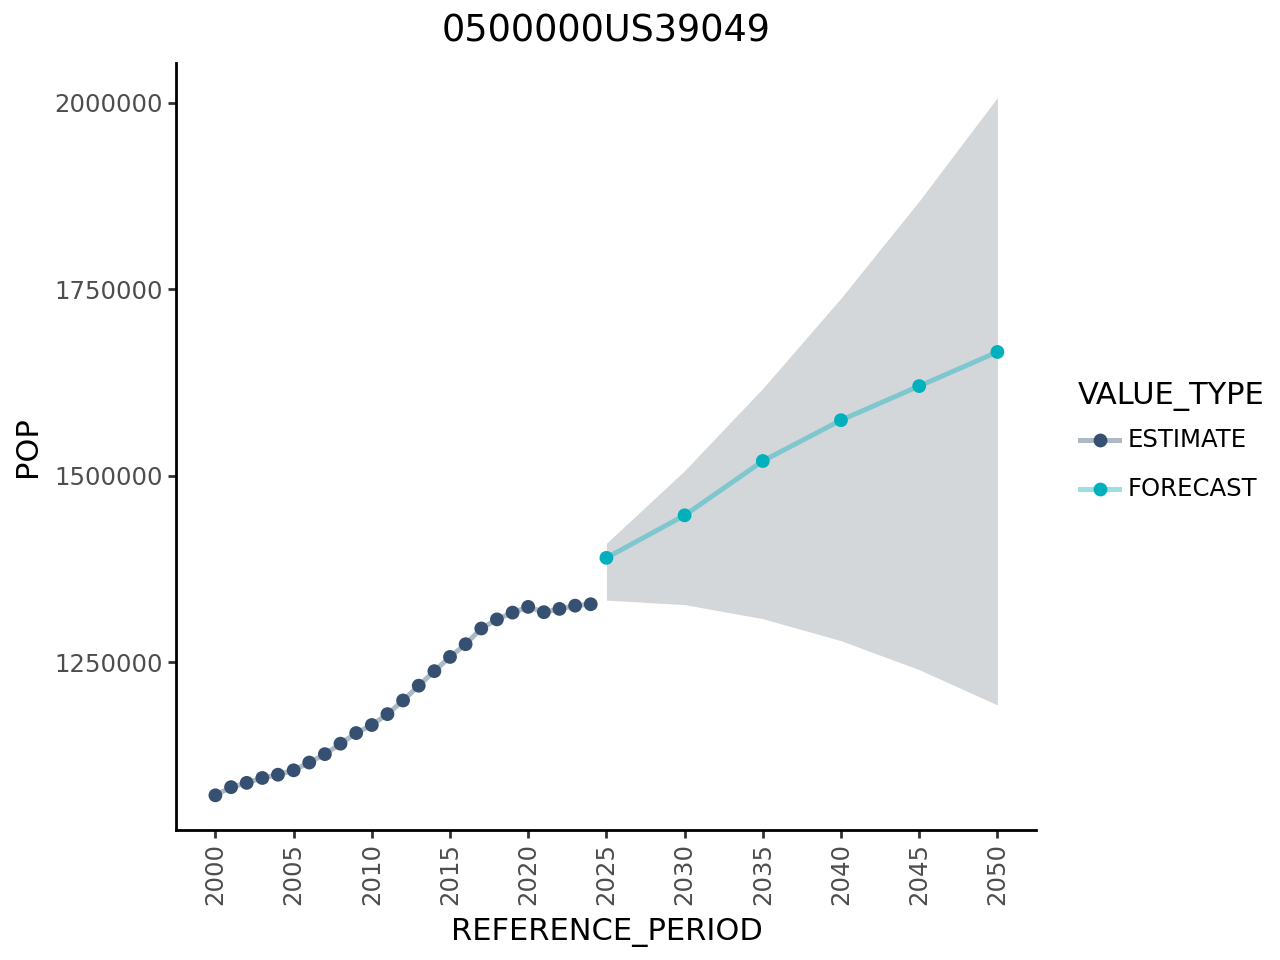

In [58]:
plot